In [1]:
import pandas as pd
import numpy as np


In [4]:
from IPython import get_ipython
from IPython import display

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/mushroom_cleaned.csv')
df.head()

Mounted at /content/drive


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [7]:
df.isnull().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [9]:
df.shape

(54035, 9)

In [10]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [11]:
df['season'].value_counts()

,count
season,
0.943195,27210
0.888450,20387
1.804273,4219
0.027372,2219


In [12]:
df['class'].value_counts()

,count
class,
1,29675
0,24360


In [13]:
X = df.drop(columns=['class'])
y = df['class'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [14]:
X_train

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
48399,515,5,1,6,0.947425,560,7,0.943195
15770,625,2,5,5,0.966469,1094,7,0.943195
240,684,6,2,10,0.441242,1382,11,0.888450
24984,1047,6,6,5,0.111837,2508,8,0.943195
37689,588,6,5,3,0.255081,709,6,0.943195
...,...,...,...,...,...,...,...,...
45891,412,6,4,5,0.290040,1245,1,0.888450
52416,434,5,4,5,1.178206,430,6,0.888450
42613,263,0,0,5,1.336515,200,3,0.943195
43567,806,6,4,8,0.600402,1393,1,0.888450


In [15]:
X_test

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
35550,713,6,0,5,1.213166,1321,6,0.943195
43142,394,0,0,5,2.211892,640,11,0.888450
19276,631,6,1,6,0.008384,1228,11,0.943195
7793,901,2,6,10,1.893573,1154,11,0.943195
32044,1028,6,5,11,0.771498,1739,6,0.888450
...,...,...,...,...,...,...,...,...
43487,1128,6,4,11,1.105733,2249,6,0.943195
15104,489,0,5,10,0.454030,833,3,0.943195
11843,31,6,0,11,1.042921,26,11,0.888450
37506,516,6,5,5,0.286913,634,6,0.943195


In [16]:
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [17]:
y_test

array([1, 1, 0, ..., 1, 1, 1])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.14667288,  0.46323386, -0.51129491, ..., -0.62933887,
        -0.43598965, -0.02740052],
       [ 0.15934241, -0.92345235,  1.28468741, ...,  0.05273369,
        -0.43598965, -0.02740052],
       [ 0.32347788,  0.9254626 , -0.06229933, ...,  0.42059305,
         0.7913856 , -0.20626536],
       ...,
       [-0.84772607, -1.84790983, -0.96029049, ..., -1.08916307,
        -1.66336491, -0.02740052],
       [ 0.66287664,  0.9254626 ,  0.83569183, ...,  0.43464324,
        -2.27705254, -0.20626536],
       [ 1.82573472,  0.9254626 , -0.06229933, ...,  0.76035204,
         0.7913856 , -0.02740052]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [21]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6624 - loss: 0.6010 - val_accuracy: 0.7629 - val_loss: 0.4801
Epoch 2/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7987 - loss: 0.4299 - val_accuracy: 0.8409 - val_loss: 0.3644
Epoch 3/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8619 - loss: 0.3274 - val_accuracy: 0.8774 - val_loss: 0.2876
Epoch 4/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8942 - loss: 0.2598 - val_accuracy: 0.8973 - val_loss: 0.2519
Epoch 5/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9136 - loss: 0.2231 - val_accuracy: 0.9112 - val_loss: 0.2256
Epoch 6/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9280 - loss: 0.1948 - val_accuracy: 0.9204 - val_loss: 0.2031
Epoch 7/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9358 - loss: 0.1766 - val_accuracy: 0.9299 - val_loss: 0.1818
Epoch 8/50
1216/1216 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9407 - loss: 0.1627 - 

In [25]:
ylog = model.predict(X_test_scaled)

338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
ylog[0]

array([0.9999236], dtype=float32)

In [27]:
y_pred = np.where(ylog>0.5,1,0)

In [30]:
y_pred[2]

array([0])

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.982141204774683

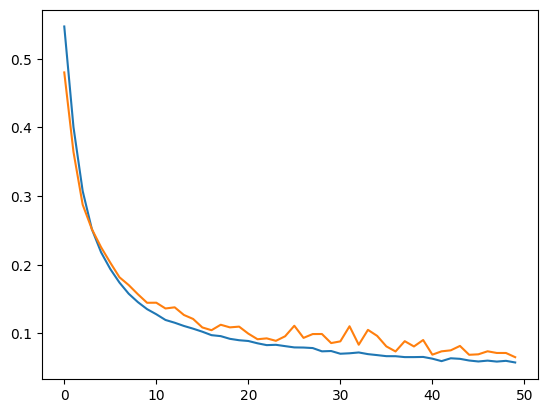

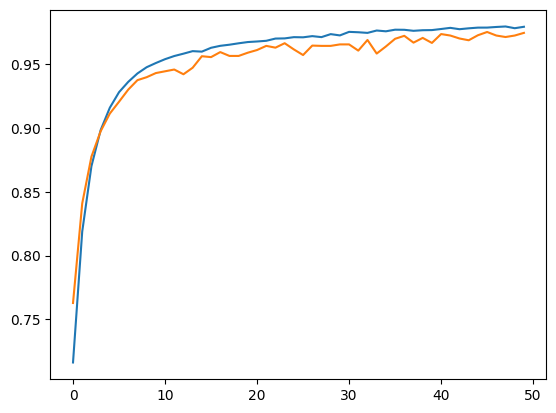

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

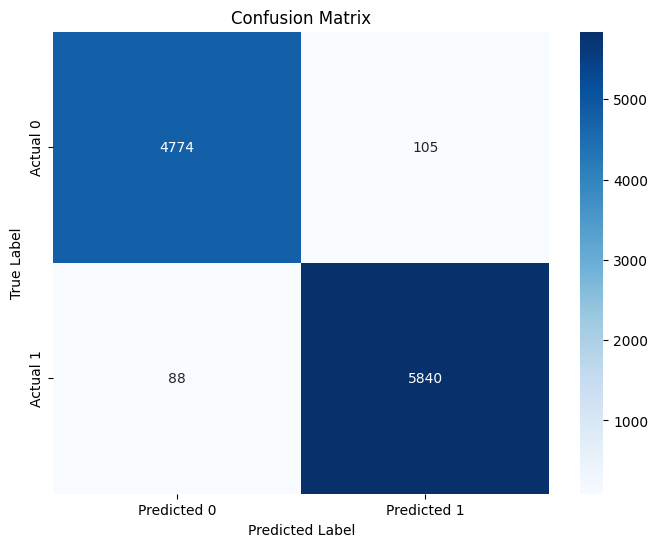

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()